# Milestone 1 - Data Visualization Complementary Views 

## Author - Connor Higgins

## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [1]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175677 entries, 0 to 175676
Data columns (total 9 columns):
GameCode        175677 non-null object
DateFormat      175677 non-null object
Hour            175677 non-null int64
TablesOcc       175677 non-null int64
TablesOpen      175677 non-null int64
TablesClosed    175677 non-null int64
HeadCount       175677 non-null int64
DayOfWeek       175677 non-null int64
DayNumber       175677 non-null int64
dtypes: int64(7), object(2)
memory usage: 12.1+ MB


JitteredHeadCount.csv consists of two categorical variables (GameCode, DataFormat) and seven numeric variables; futhermore, there are 175,677 rows.

Total Number of Games: 22
Max Entries: 8778
Min Entries: 118


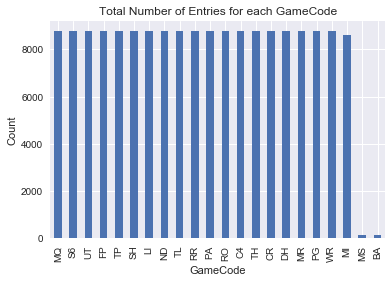

In [3]:
sns.set()
headcount_df['GameCode'].value_counts().plot(kind='bar') #barplot of value_counts of column GameCode
plt.title('Total Number of Entries for each GameCode')
plt.ylabel('Count')
plt.xlabel('GameCode')
print('Total Number of Games: {}'.format(len(headcount_df['GameCode'].value_counts()))) # obtaining total number of rows
print('Max Entries: {}'.format(headcount_df['GameCode'].value_counts().max())) # obtaining max entries of all GameCodes
print('Min Entries: {}'.format(headcount_df['GameCode'].value_counts().min())) # obtaining min entries of all GameCodes

#### Figure 1. Barplot of Total Number of Entries for each GameCode
There are a total of 22 different GameCodes, most of which have 8,788 entries. MI, or Omaha Hi-Low, has 8630 entires while MS, or Mississippi Stud, has 147. As these both add up to 8788, one could predict that MS is played instead of MI on certain select days of the year. BA, or Baccarat, has just 118 entries, meaning that, like MS, it is likely only available to play during a special event. 

Total Number of Dates: 366
Max Entries: 504
Min Entries: 420


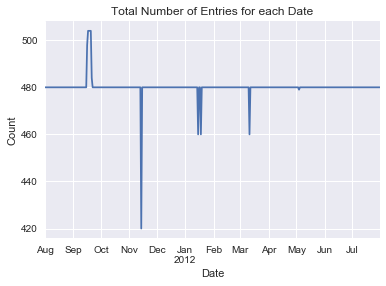

In [4]:
headcount_df['DateFormat'] = pd.to_datetime(headcount_df['DateFormat']) #converting column DateFormat to pandas readable datatype
headcount_df['DateFormat'].value_counts().sort_index().plot() #plotting dates chronologically
plt.title('Total Number of Entries for each Date')
plt.ylabel('Count')
plt.xlabel('Date')
print('Total Number of Dates: {}'.format(len(headcount_df['DateFormat'].value_counts())))
print('Max Entries: {}'.format(headcount_df['DateFormat'].value_counts().max()))
print('Min Entries: {}'.format(headcount_df['DateFormat'].value_counts().min()))

#### Figure 2. Time Series plot of Total Number of Entries for each Date.
JitteredHeadCount.csv contains slightly more than a full year of casino GameCode and respective Table and HeadCount information, starting on 9/9/2011 and ending on 7/31/2012. While most dates contain 480 entries, there are five dates with fewer entries and six dates with more entries. For those with fewer entries, the fewest (420) is in the middle of November, three with 460 entries are in mid-January (2) and March (1), and 1 with 479 enrtries is at the beginning of May. For those with more entries, all six dates occur sequentially, starting and ending in the middle of September and maxing out at 504 total entries.  

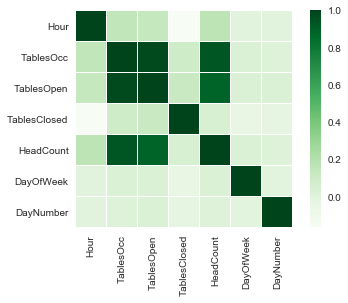

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000641,-0.000149
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.029641,0.020292
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.031448,0.029192
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.038390,-0.028820
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.031059,0.014838
DayOfWeek,-0.000641,0.029641,0.031448,-0.038390,0.031059,1.000000,-0.002442
DayNumber,-0.000149,0.020292,0.029192,-0.028820,0.014838,-0.002442,1.000000


In [5]:
sns.heatmap(headcount_df.corr(), #generating a heatmap using pandas.DataFrame.corr()
            square=True, linewidths=.1, cmap="Greens")
plt.show()
headcount_df.corr()

#### Figure 3. Correlation Heatmap for the seven numeric variables, alongside its respective DataFrame.
Two representations of the strength of correlation between numeric variables within JitteredHeadCount.csv. Points of interest include the correlation between TablesOcc and TablesOpen (0.973), TablesOcc and HeadCount (0.932), and TablesOpen and HeadCount (0.889). These correlations are intuitive, as tables are likely opened as the number of tables occupied increases, headcount would need to increase for tables to be occupied, and new tables are likely opened up in response to an increase in headcount. 

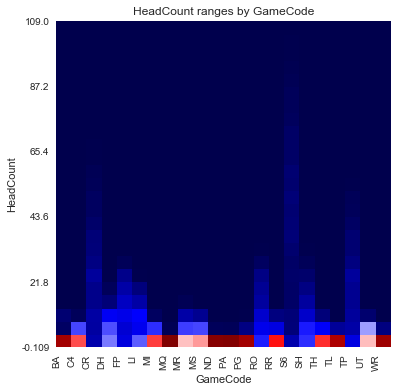

In [6]:
headcount_df.loc[:, 'HeadCount_bin'], Bins  = pd.cut(
    headcount_df.loc[:, 'HeadCount'], bins = 25, retbins=True) # 25 bins from HeadCount column, returning bins for yticklabels
Game_HeadCount = pd.crosstab(headcount_df.loc[:, 'HeadCount_bin'], headcount_df.loc[:, 'GameCode'])
TotalGame_HeadCount = Game_HeadCount.apply(sum, axis = 0) # getting column totals
Game_HeadCount = Game_HeadCount.div(TotalGame_HeadCount, axis = 1)

ax = plt.figure(figsize=(6, 6)).gca() # defining axis
ax.pcolor(Game_HeadCount, cmap = 'seismic') # using seismic color palette for improved contrast
ax.set_xticks(range(Game_HeadCount.shape[1]))
ax.set_xticklabels(Game_HeadCount.columns, rotation=90)
ax.set_xlabel('GameCode')
ax.set_yticklabels(Bins[::5]) # obtaining every 5th bin for the yticklabels
ax.set_ylabel('HeadCount')
ax.set_title('HeadCount ranges by GameCode')
plt.show()

#### Figure 4. Binned HeadCount Frequency Heatmap 
A Heatmap created from binning the HeadCount column and grouping by GameCode. The plot depicts the variance in a GameCode's headcount range. Some games like CR (Craps), S6 (Big Six), and TP (Texas Hold'em Poker) fluctuate considerably in the number of people playing them at one time. Other games like BA (Bacarat), MQ (Blackjack variant), ND (Blackjack variant), PA (Pai Gow Tiles), TL (Blackjack variant), and WR (Casino War) almost always have a total HeadCount of 5 or fewer. 

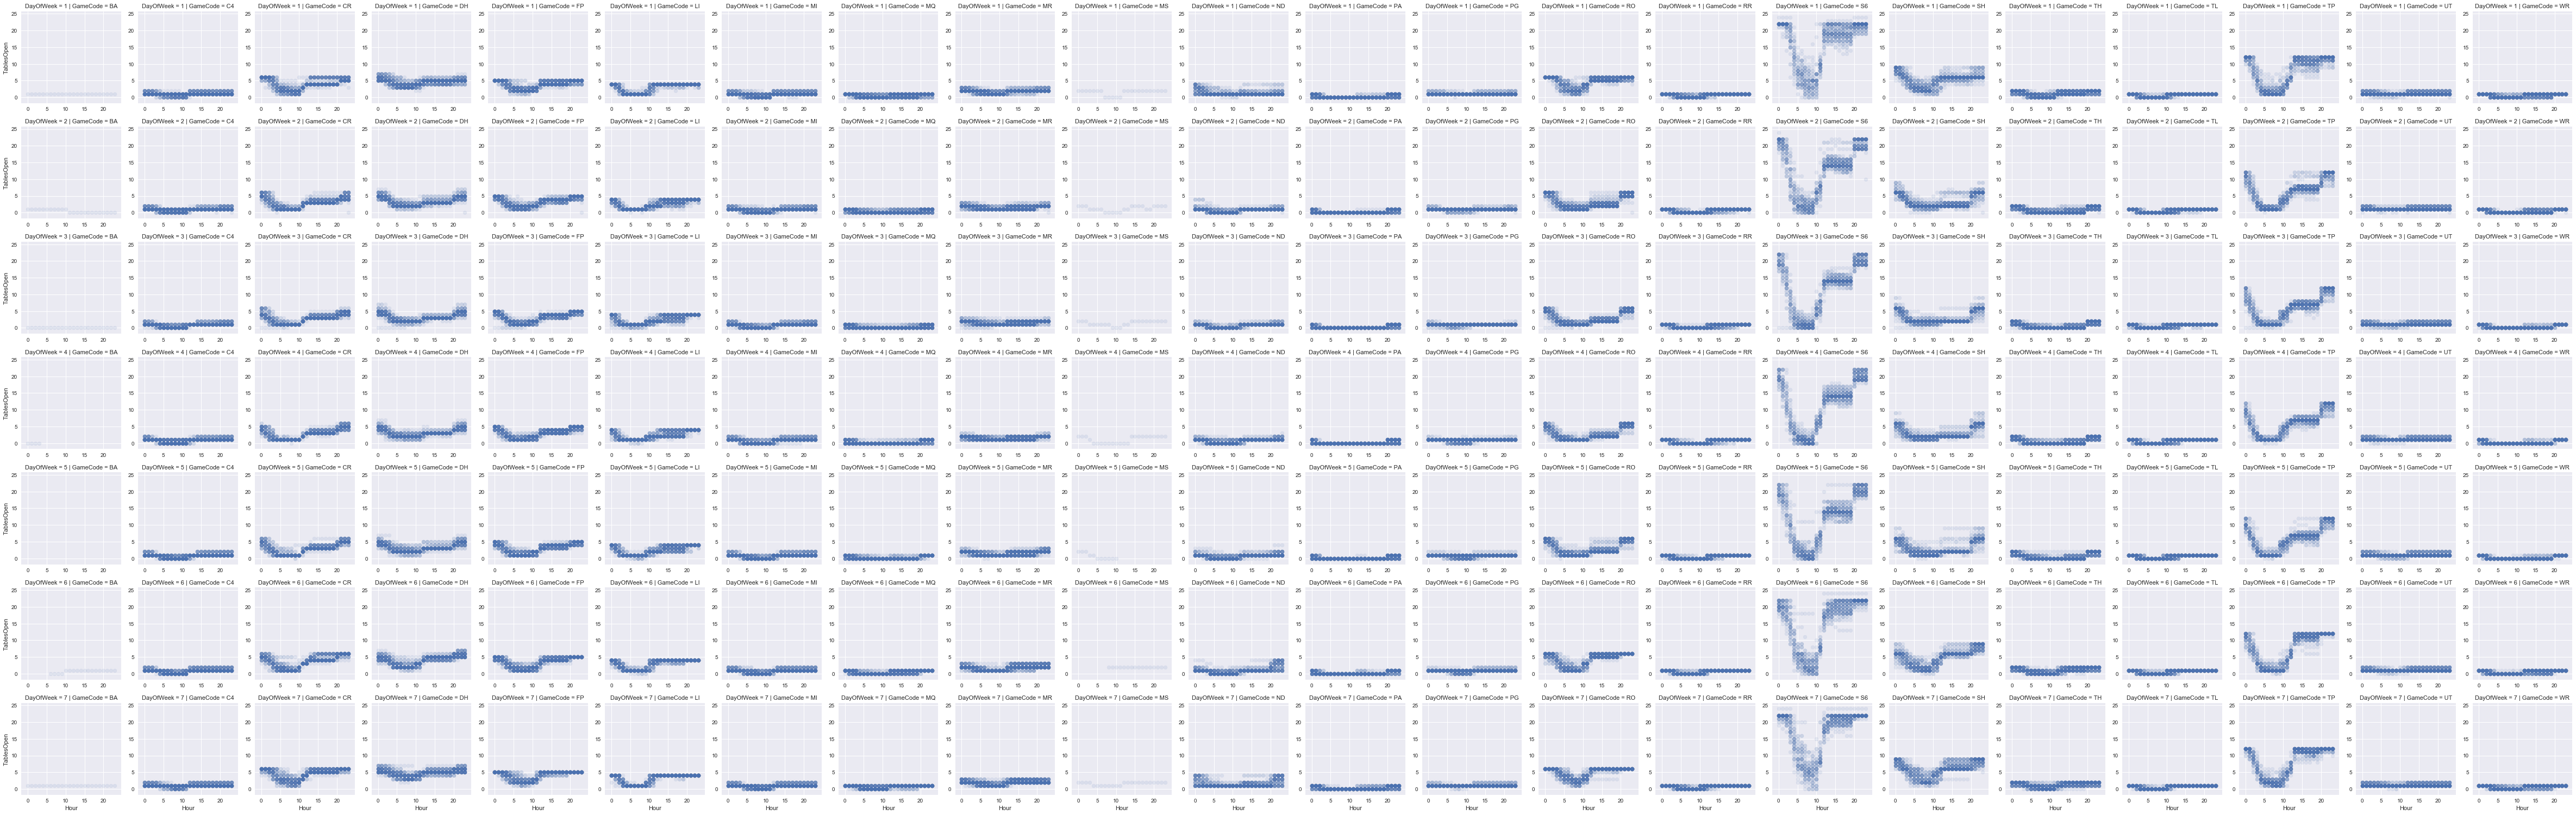

In [7]:
c = sns.FacetGrid(headcount_df,
                 col="GameCode",
                 row="DayOfWeek",
                 palette="Set2")
c = c.map(plt.scatter, "Hour", "TablesOpen", alpha=.1)

#### Figure 5. FacetGrid (Rows: DayOfWeek, Columns: GameCode) of Scatter plots of Hour v. TablesOpen. 
A FacetGrid was used to separate hourly information on TablesOpen by both GameCode (columns) and DayOfWeek (rows). 

Columns: Like the variance found in GameCode headcounts, the variance in the number of tables opened is highly dependent on GameCode. Some games like BA (Baccarat) and MS (Mississippi Stud) are only played on special occasions, and even then only 1-2 tables are opened. Other games are played throughout the year, though again only a few tables are opened (e.g. C4, MI, MQ, MR, ND, PA, PG, RR, TH, TL, UT, WR). Then there are games where 10 or more tables are open in the early hours of the morning, all but 1-5 tables are closed between the hours of 5 and 10, and finally previously closed tables are then reopened by 12. These include GameCodes such as S6 and TP. 

Rows: Each row of the FacetGrid represents a day of the week, starting on Sunday (1) and ending on Saturday (7). Though not as apparent as the differences in TablesOpen between various GameCodes, there are some differences in a GameCodes' Hour v. HeadCount plot throughout the week. Special occasion games like BA and MS have considerably different plots: BA, for example, is played on 1 table all day on Sunday, 1 table for 12 hours in the morning on Monday, 0 tables for Tuesday, Wednesday, & Thursday, 1 table for 12 hours in the evening on Friday, and 1 table all day on Sunday. MS is played on at most 2 tables, and the number of tables opened (and at what time) fluctuates wildly based on the day. High HeadCount/TablesOpen games like S6 and TP see some variation based on week day as well: S6, for example, has fewer tables open on Monday, Tuesday, Wednesday, & Thursday between the hours of 12am and 7pm than on Friday, Saturday, & Sunday.

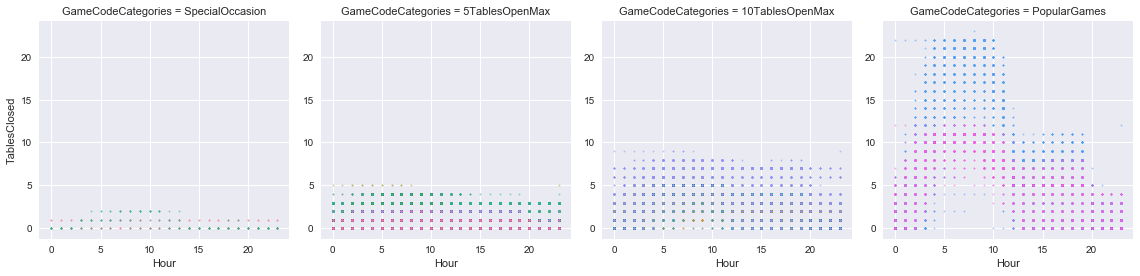

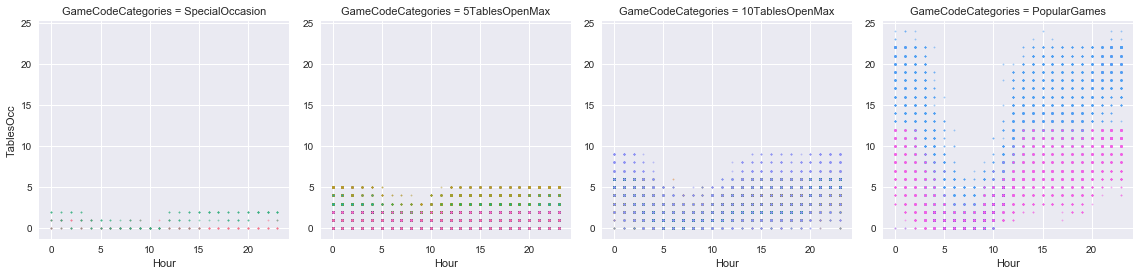

In [8]:
headcount_df['GameCodeCategories'] = '' # creating new categorical column for grouping GameCodes by max tables opened

headcount_df.loc[headcount_df.loc[:, "GameCode"] == "BA", "GameCodeCategories"] = "SpecialOccasion"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "MS", "GameCodeCategories"] = "SpecialOccasion"

headcount_df.loc[headcount_df.loc[:, "GameCode"] == "C4", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "FP", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "LI", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "MI", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "MQ", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "MR", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "ND", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "PA", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "PG", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "RR", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "TH", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "TL", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "UT", "GameCodeCategories"] = "5TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "WR", "GameCodeCategories"] = "5TablesOpenMax"

headcount_df.loc[headcount_df.loc[:, "GameCode"] == "CR", "GameCodeCategories"] = "10TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "DH", "GameCodeCategories"] = "10TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "RO", "GameCodeCategories"] = "10TablesOpenMax"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "SH", "GameCodeCategories"] = "10TablesOpenMax"

headcount_df.loc[headcount_df.loc[:, "GameCode"] == "S6", "GameCodeCategories"] = "PopularGames"
headcount_df.loc[headcount_df.loc[:, "GameCode"] == "TP", "GameCodeCategories"] = "PopularGames"


c = sns.FacetGrid(headcount_df,  # creating a FacetGrid for GameCodeCategories with scatter plots Hour v. TablesClosed 
                 col="GameCodeCategories",
                 hue="GameCode", size=4)
c = c.map(plt.scatter, "Hour", "TablesClosed", s=2, alpha=0.5) #changing size and alpha for readability
b = sns.FacetGrid(headcount_df, # creating a FacetGrid for GameCodeCategories with scatter plots Hour v. TablesOcc
                 col="GameCodeCategories",
                 hue="GameCode", size=4)
b = b.map(plt.scatter, "Hour", "TablesOcc", s=2, alpha=0.5) #changing size and alpha for readability

#### Figure 6.  Two FacetGrids (Columns: GameCodeCategories) of Scatter plots of Hour v. TablesClosed and Hour v. TablesOcc respectively. 
Two FacetGrids were used to separate entries based on categories within the derived GameCodeCategories column: Special Occasion (BA, MS), 5TablesOpenMax (C4, FP, LI, MI, MQ, MR, ND, PA, PG, RR, TH, TL, UT, WR), 10TablesOpenMax (CR, DH, RO, SH), and PopularGames (S6, TP). The top FacetGrid plots Hour v. TablesClosed, while the bottom FacetGrid plots Hour v. TablesOcc.

At first glance, there appears to be a negative correlation between TablesClosed and TablesOcc: as the number of tables closed increases, the number of tables occupied decreases. This same relationship is seen between TablesClosed and TablesOpen. As mentioned in Figure 5, the increase in tables closed occurs between the hours or 5 and 10 in the morning. This increase becomes more pronounced as one moves right along the FacetGrid and up the sizes of GameCode Category. For some games in both SpecialOccasion and 5TablesOpenMax categories, the increase is minimal to none.